In [ ]:
#######################
# CONFIG ZONE
#######################

# Importing Libs
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from collections import Counter
import numpy as np

# My Tools
import milanesas.eda_helper as eh
from tools.helpers import (
    get_column_uniques,
    get_column_uniques_count,
    plot_grouped_by_category_barh_charts,
    barh_chart_unique_values,
    print_unique_normalized_values_by_group,
    make_vertical_grouped_chart,
    make_horizontal_grouped_chart,
    barh_chart_count,
)


%matplotlib inline

# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [1]:
df = pd.read_csv("../data/data_fixed.csv")

In [2]:
df = df.drop("Unnamed: 0", axis=1)
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

# **Demographics**
   - Género
   - Edad actual


### Gender

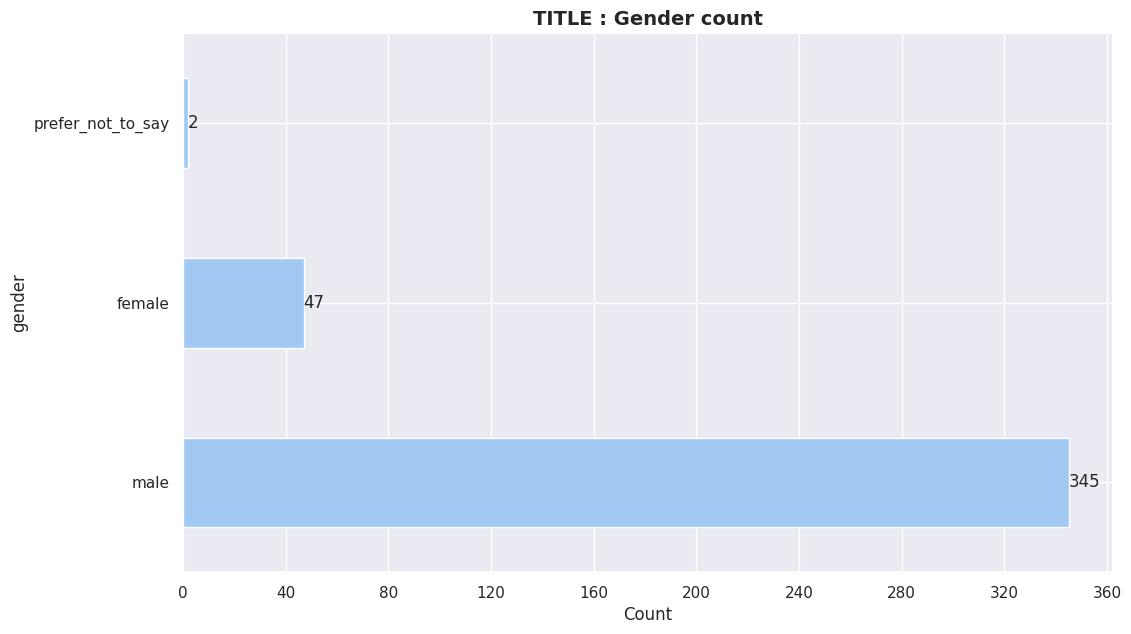

In [3]:
barh_chart_count(df, "gender", "TITLE : Gender count", "Count")

### Current age.

In [4]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

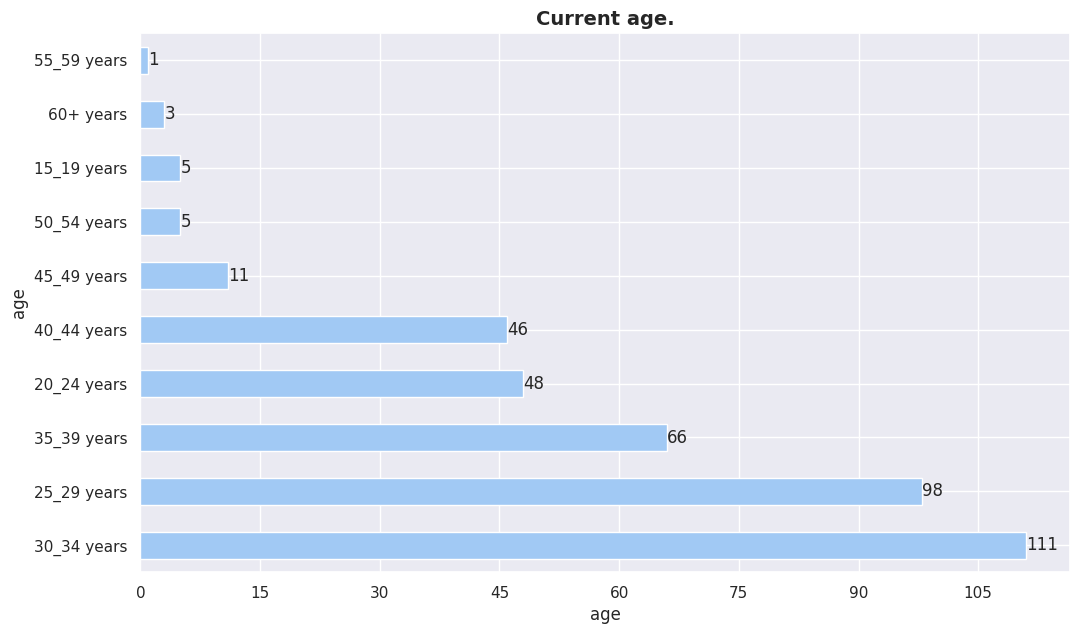

In [5]:
barh_chart_count(df, "age", "Current age.", "age")

In [6]:
# Ages by gender.

In [7]:
gender_groups = df.groupby("gender")
print(gender_groups.groups.keys())

dict_keys(['female', 'male', 'prefer_not_to_say'])


In [10]:
group_config = {
    "title": "edad_actual by Gender",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "Count",
    "ylabel": "Edad actual",
}

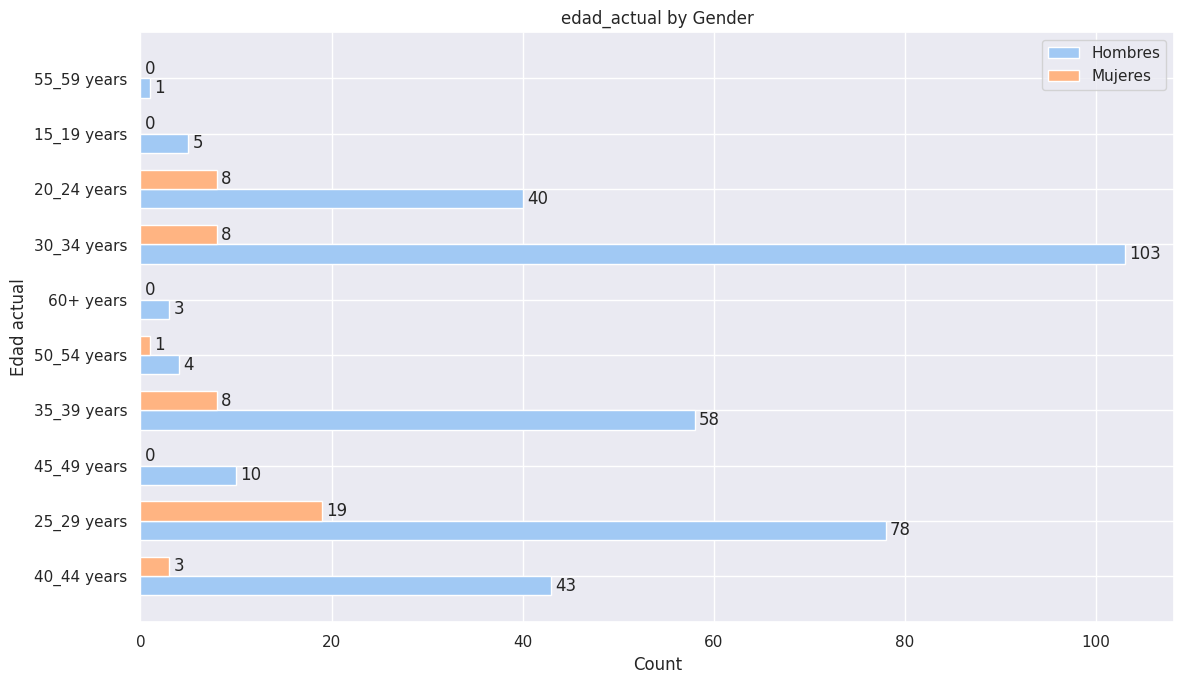

In [11]:
make_horizontal_grouped_chart(
    df,
    gender_groups.get_group("male"),
    gender_groups.get_group("female"),
    "age",
    get_column_uniques(df, "age"),
    group_config,
)

In [12]:
for i in gender_groups.groups.keys():
    print("Grupo -> ", i)
    print(gender_groups.get_group(i)["age"].value_counts())
    print("\n" * 5)

Grupo ->  female
age
25_29 years    19
35_39 years     8
30_34 years     8
20_24 years     8
40_44 years     3
50_54 years     1
Name: count, dtype: int64






Grupo ->  male
age
30_34 years    103
25_29 years     78
35_39 years     58
40_44 years     43
20_24 years     40
45_49 years     10
15_19 years      5
50_54 years      4
60+ years        3
55_59 years      1
Name: count, dtype: int64






Grupo ->  prefer_not_to_say
age
25_29 years    1
45_49 years    1
Name: count, dtype: int64






